In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [15]:
df_lung_gene = pd.read_csv("LUNG_Gene_Expression.txt",delimiter="\t",encoding="ASCII")
df_lung_gene
column_names = df_lung_gene.columns.values.tolist()
column_names.append("")
df_lung_gene.columns=column_names[1:]
df_lung_gene = df_lung_gene.iloc[: , :-1]
df_lung_gene

,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,TCGA-18-3419-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
NTS,-0.806226,-0.382872,0.401741,-1.411283,0.753000,0.736499,0.884528,-0.658622,-1.364281,-0.026033,...,0.790486,1.034772,-0.702329,-1.199132,0.508934,0.970896,1.229138,0.112034,1.176520,0.344574
KRT14,1.479097,1.444322,-0.860771,-1.215284,0.393626,0.563601,0.050821,0.637788,-1.426153,-0.384999,...,-1.040541,1.419102,0.598151,-0.381585,0.993165,0.716151,-1.267115,-1.044408,0.583019,-0.377197
SPRR3,0.126642,1.202567,0.165575,-1.399032,-0.061173,1.229682,0.230877,1.055121,-0.371628,1.080481,...,-0.214095,1.181017,0.221319,-1.700355,-0.028831,0.894141,-0.121553,0.651901,-0.190551,0.994301
KRT13,1.103173,1.163743,0.068945,-0.861872,-1.101405,1.458346,-0.456045,0.360896,0.478252,1.018959,...,-0.505752,1.074723,0.184191,-0.222527,0.849239,0.838823,0.224248,0.346868,0.069941,-0.816551
UPK1B,-1.088276,-1.069109,0.674922,-1.130374,-1.070265,1.286183,1.492973,0.932590,0.047729,-1.082025,...,-0.859273,0.942833,0.586808,-0.725825,0.915616,1.189197,0.886122,1.345704,1.339203,1.064178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VENTXP1,-0.810489,-1.091847,1.218147,0.175967,0.551999,-0.270678,-0.267370,0.361156,-0.485846,-0.093061,...,-0.752660,-0.156968,-0.920561,-2.529254,-1.045408,-0.670280,0.088121,-0.798240,-0.261488,-0.149061
MLANA,-1.198464,-0.576663,-0.302991,-0.848979,0.125662,2.049000,1.031505,-0.456276,0.455266,1.088892,...,-0.568441,-0.310289,0.228336,-1.339754,-0.598350,0.098655,0.617610,1.672074,0.845341,1.524809
GYPA,0.973651,1.059816,-0.587189,0.042065,0.000326,0.098236,0.165050,0.619662,1.656873,1.579092,...,0.755889,-0.137590,0.255630,-0.376199,-0.682640,0.033064,1.152504,1.638837,0.459291,-0.985150
GLP1R,2.241320,1.225202,0.165238,-1.482635,1.005144,-0.521220,-0.919912,0.598427,0.606170,0.209909,...,-0.766265,1.348975,0.287129,0.147118,-0.836053,-0.466965,-0.851409,-3.256052,0.045632,-0.196674


In [16]:
matrix_lung_gene=df_lung_gene.corr(method='spearman')
#matrix_lung_methy=df_lung_methy.corr(method='spearman')
#matrix_lung_mirna=df_lung_mirna.corr(method='spearman')

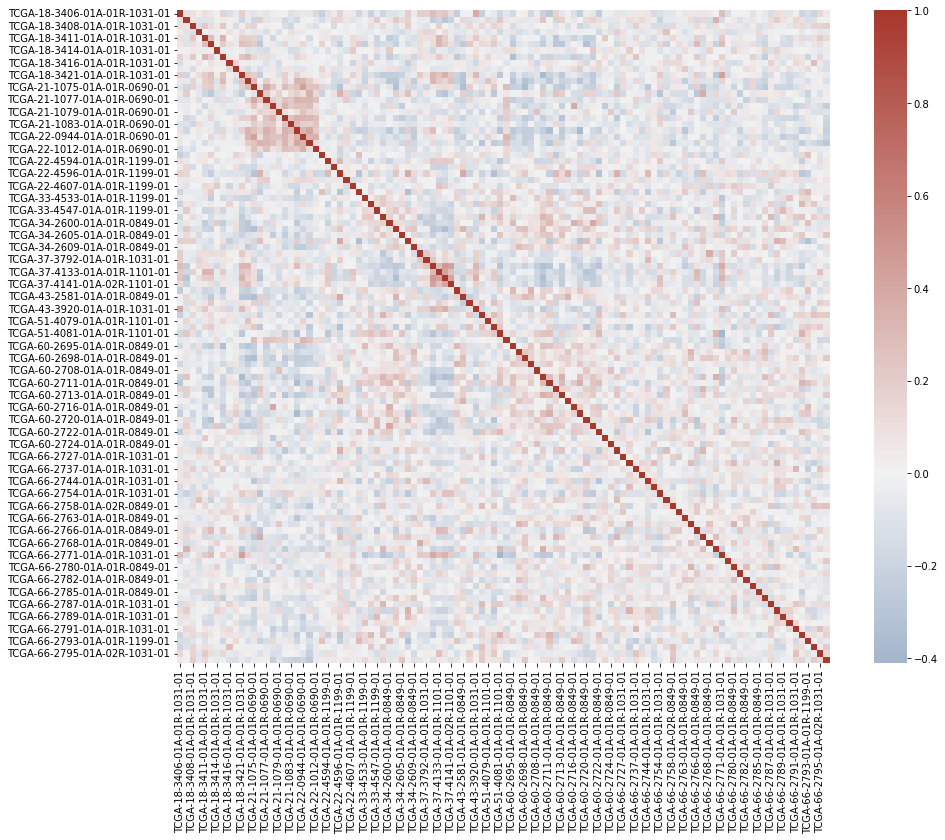

In [17]:
#LUNG_GENE
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_gene, center=0,
                fmt='.2f', square=True, cmap=cmap)

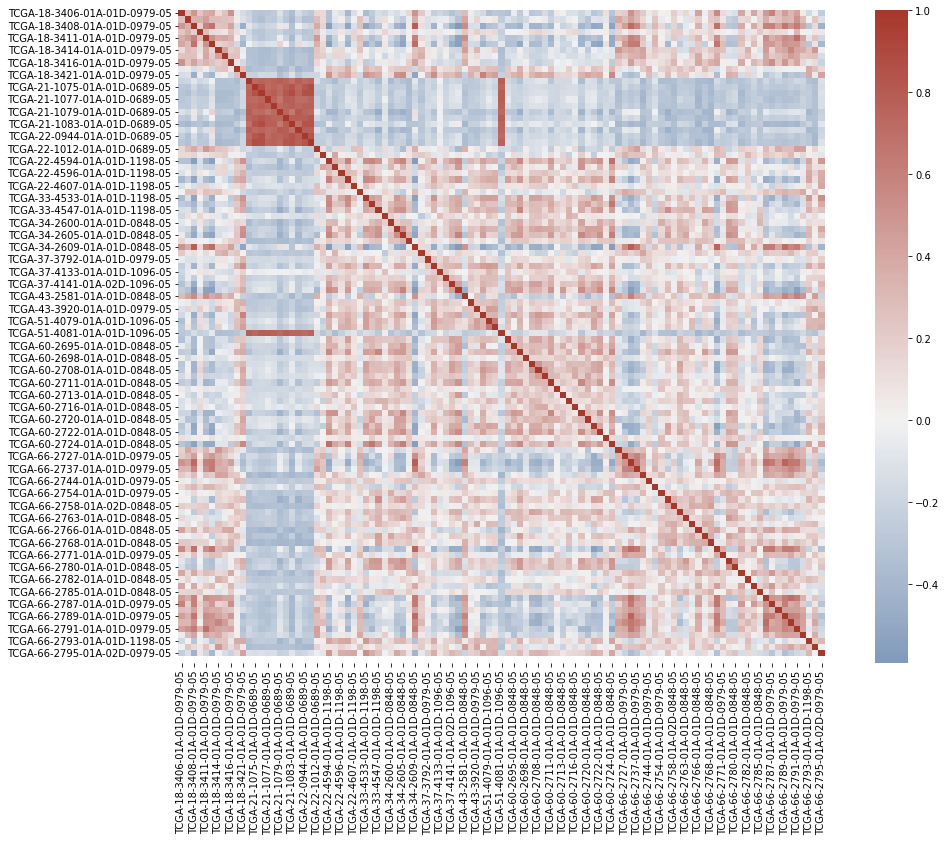

In [42]:
#LUNG_METHY
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_methy, center=0,
                fmt='.2f', square=True, cmap=cmap)

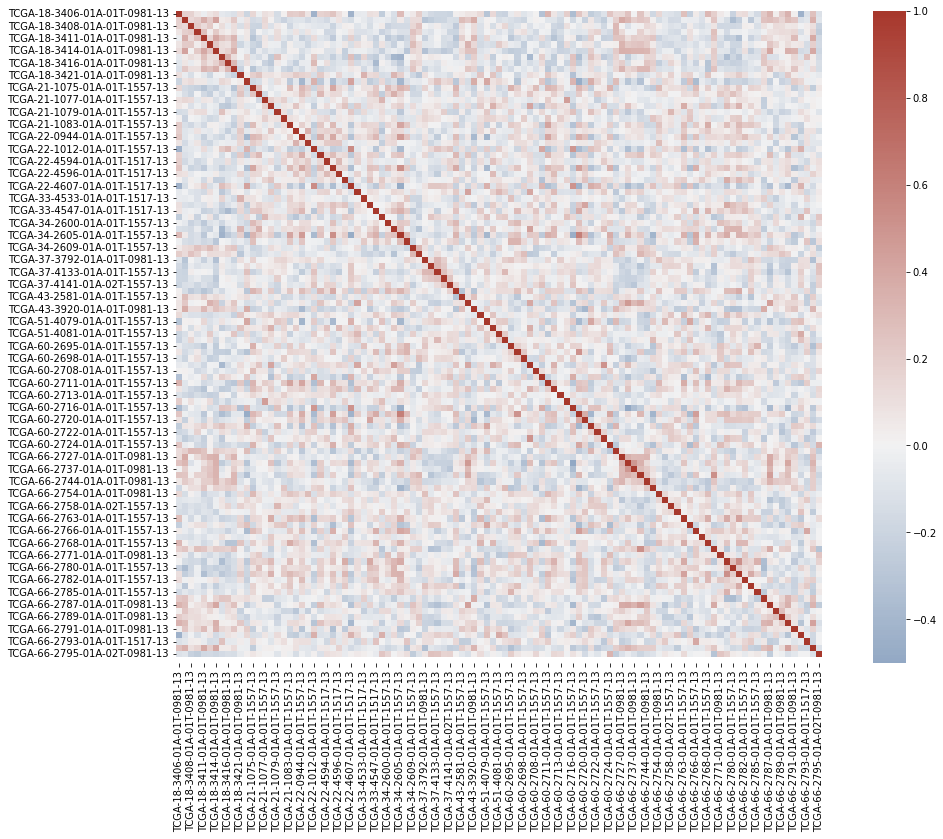

In [43]:
#LUNG_MIRNA
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_mirna, center=0,
                fmt='.2f', square=True, cmap=cmap)

###Build the Patient similarity networks for each datatype. Use a weighted network where each edge is weighted by the correlation between its two nodes. In the correlation matrix, we compute all pairs of patients. We can define a threshold for which a connection can be considered. Two patients (i,j) are connected in the graph: if |corr(i,j)| >= X. Thus, in the graph only edges corresponding to a correlation greater than X are considered.

Hint: use the NetworkX package.



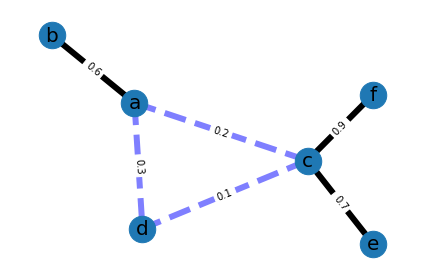

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [99]:
print(matrix_lung_gene.rows.values)

AttributeError: 'DataFrame' object has no attribute 'rows'

In [20]:
G = nx.from_pandas_adjacency(matrix_lung_gene)

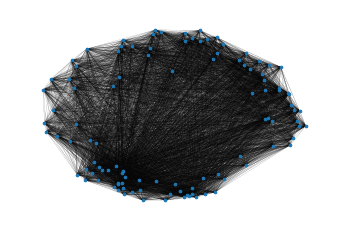

In [45]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.3 and u != v]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if u != v]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=7)

# edges
#nx.draw_networkx_edges(G, pos, edgelist=elarge, width=0.1)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=0.1)


# node labels

# edge weight labels
nx.write_gexf(G,"./here.gexf")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")

plt.show()

In [76]:
threshold = 0.2

# filter out all edges above threshold and grab id's
long_edges = list(filter(lambda e: e[2] > threshold, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)

In [77]:
print(nx.info(G))

Graph with 106 nodes and 5225 edges


C:\Users\lmtrinta\AppData\Local\Temp\ipykernel_7372\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
